# of users: 943,  # of items: 1682,  # of ratings: 100000
train_data size [[3. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
valid_data size (943, 1682)
test_data size (943, 1682)
model training...


user_user_sim_matrix (k=1): 100%|██████████| 943/943 [00:08<00:00, 109.14it/s]


training time:  8.646371126174927
model evaluation
evaluation time:  0.7985849380493164
model training...


user_user_sim_matrix (k=5): 100%|██████████| 943/943 [00:08<00:00, 108.78it/s]


training time:  8.67514181137085
model evaluation
evaluation time:  0.7904222011566162
model training...


user_user_sim_matrix (k=10): 100%|██████████| 943/943 [00:08<00:00, 109.12it/s]


training time:  8.647294282913208
model evaluation
evaluation time:  0.8006887435913086
model training...


user_user_sim_matrix (k=100): 100%|██████████| 943/943 [00:08<00:00, 108.19it/s]


training time:  8.721884727478027
model evaluation
evaluation time:  0.825714111328125
model training...


user_user_sim_matrix (k=500): 100%|██████████| 943/943 [00:08<00:00, 108.39it/s]


training time:  8.705359935760498
model evaluation
evaluation time:  0.8394780158996582
model training...


item_item_sim_matrix (k=1): 100%|██████████| 1682/1682 [00:26<00:00, 62.45it/s] 


training time:  26.94865870475769
model evaluation
model training...


item_item_sim_matrix (k=5): 100%|██████████| 1682/1682 [00:26<00:00, 63.64it/s] 


training time:  26.444217443466187
model evaluation
model training...


item_item_sim_matrix (k=10): 100%|██████████| 1682/1682 [00:26<00:00, 63.30it/s] 


training time:  26.585651874542236
model evaluation
model training...


item_item_sim_matrix (k=100): 100%|██████████| 1682/1682 [00:26<00:00, 62.61it/s] 


training time:  26.87846803665161
model evaluation
model training...


item_item_sim_matrix (k=500): 100%|██████████| 1682/1682 [00:26<00:00, 62.64it/s] 


training time:  26.864619970321655
model evaluation
RMSE on Test Data
UserKNN,K=1: 1.737231
UserKNN,K=5: 1.119028
UserKNN,K=10: 1.040761
UserKNN,K=100: 0.963961
UserKNN,K=500: 0.964693
ItemKNN,K=1: 2.050220
ItemKNN,K=5: 1.165208
ItemKNN,K=10: 1.052499
ItemKNN,K=100: 0.988824
ItemKNN,K=500: 0.988756


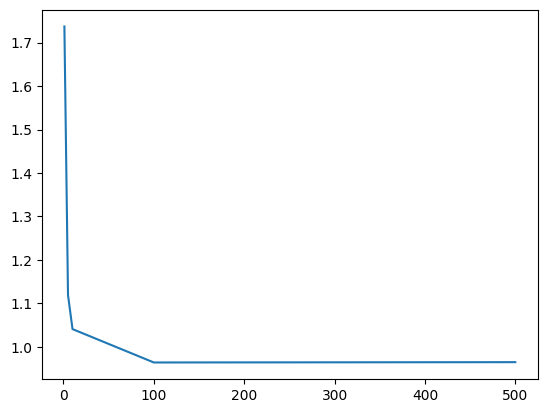

In [1]:
# 기본 패키지 import
import warnings
import random
import numpy as np
from time import time
from utils import load_data


warnings.filterwarnings('ignore')

def seed_everything(random_seed):
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)


from models.UserKNN_explicit import UserKNN
from models.ItemKNN_explicit import ItemKNN

"""
dataset loading
"""
dataset = "movielens_100k.csv"
train_data, valid_data, test_data = load_data(dataset, implicit=False)

print('train_data size',train_data)
print('valid_data size',valid_data.shape)
print('test_data size',test_data.shape)

# for i, row in enumerate(train_data):
#     print('i',i)
#     print('row',row)
#     train_data[i,np.where(row<0.5)] = np.nan
#     print('glglrow',row)


time_start = time()
userknn_RMSE1 = UserKNN(train=np.copy(train_data), valid=valid_data, test= test_data, top_k=1)
userknn_RMSE5 = UserKNN(train=np.copy(train_data), valid=valid_data, test= test_data, top_k=5)
userknn_RMSE10 = UserKNN(train=np.copy(train_data), valid=valid_data, test= test_data, top_k=10)
userknn_RMSE100 = UserKNN(train=np.copy(train_data), valid=valid_data, test= test_data, top_k=100)
userknn_RMSE500 = UserKNN(train=np.copy(train_data), valid=valid_data, test= test_data, top_k=500)
itemknn_RMSE1 = ItemKNN(train=np.copy(train_data), valid=valid_data, test=test_data, top_k=1)    
itemknn_RMSE5 = ItemKNN(train=np.copy(train_data), valid=valid_data, test=test_data, top_k=5) 
itemknn_RMSE10 = ItemKNN(train=np.copy(train_data), valid=valid_data, test=test_data, top_k=10) 
itemknn_RMSE100 = ItemKNN(train=np.copy(train_data), valid=valid_data, test=test_data, top_k=100) 
itemknn_RMSE500 = ItemKNN(train=np.copy(train_data), valid=valid_data, test=test_data, top_k=500) 

############ PLOT #################################
import matplotlib.pyplot as plt
print("RMSE on Test Data")
print("UserKNN,K=1: %f"%(userknn_RMSE1))
print("UserKNN,K=5: %f"%(userknn_RMSE5))
print("UserKNN,K=10: %f"%(userknn_RMSE10))
print("UserKNN,K=100: %f"%(userknn_RMSE100))
print("UserKNN,K=500: %f"%(userknn_RMSE500))
print("ItemKNN,K=1: %f"%(itemknn_RMSE1))
print("ItemKNN,K=5: %f"%(itemknn_RMSE5))
print("ItemKNN,K=10: %f"%(itemknn_RMSE10))
print("ItemKNN,K=100: %f"%(itemknn_RMSE100))
print("ItemKNN,K=500: %f"%(itemknn_RMSE500))
k = [1,5,10,100,500]
user_rmse = [userknn_RMSE1,userknn_RMSE5,userknn_RMSE10,userknn_RMSE100,userknn_RMSE500]
item_rmse = [itemknn_RMSE1,itemknn_RMSE5,itemknn_RMSE10,itemknn_RMSE100,itemknn_RMSE500]


plt.plot(k,user_rmse)

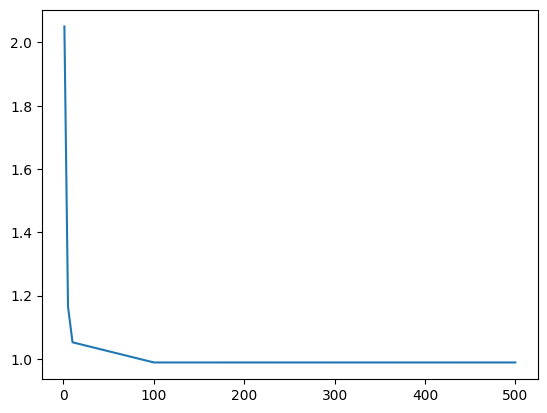

In [2]:
plt.plot(k,item_rmse)